# **Data Visualisations**

## Objectives

* Using Matplotlib, Seaborn and Plotly, create multiple visualisations such as Price vs Brand, Price vs Horsepower and etc
* Test visualisations for accuracy and usability

## Inputs

* `CarPrice_Working.CSV` from the ETL notebook

## Outputs

* Visualisations produced in Matplotlib, Seaborn and Plotly.

## Additional Comments

* We are aiming to get visualisations that are clear, purposeful and interactive. Different libraries will be used also to have variety.



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\admin\\Documents\\vscode-projects\\ci-hackaton1-car-price-analysis\\ci-hackathon1-car-price-analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\admin\\Documents\\vscode-projects\\ci-hackaton1-car-price-analysis\\ci-hackathon1-car-price-analysis'

## Import libraries

In [4]:
# Import libraries that you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load data from CSV

Load data exported from the ETL jupyter notebook

In [5]:
df_CarPriceCSV = pd.read_csv(r'Data\KaggleCarArchive\CarPrice_Working.csv')
df_CarPriceCSV.head()

,carBrand,carModel,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,Alfa-romeo,giulia,1,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,Alfa-romeo,stelvio,2,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,Alfa-romeo,Quadrifoglio,3,1,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,Audi,100 ls,4,2,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,Audi,100ls,5,2,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


---

# Price vs Brand

Matplotlib visualisations used show price against brand

In [6]:
df_byBrand = df_CarPriceCSV[['carBrand', 'price']].groupby('carBrand').mean().astype(int).reset_index()
df_byBrand.head(10)

,carBrand,price
0,Alfa-romeo,15498
1,Audi,17859
2,Bmw,26118
3,Buick,33647
4,Chevrolet,6007
5,Dodge,7875
6,Honda,8184
7,Isuzu,8916
8,Jaguar,34600
9,Mazda,10652


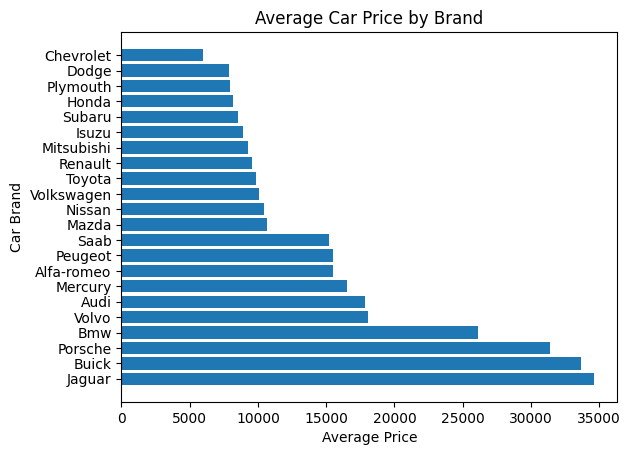

In [7]:
df_byBrand = df_byBrand.sort_values(by='price', ascending=False)

plt.barh('carBrand', 'price', data=df_byBrand)
plt.xlabel('Average Price')
plt.ylabel('Car Brand')
plt.title('Average Car Price by Brand')
plt.show()

As we can see from the graph above, Jaguars and Porsches have higher average price than the other brands, which is typically the case. Moreover, we can see that Chevrolet and Dodge manufacture more affordable cars.

---

# Price vs Horsepower

Seaborn visualisations used to show price against brand

Text(0.5, 1.01, 'Car Price vs Horsepower')

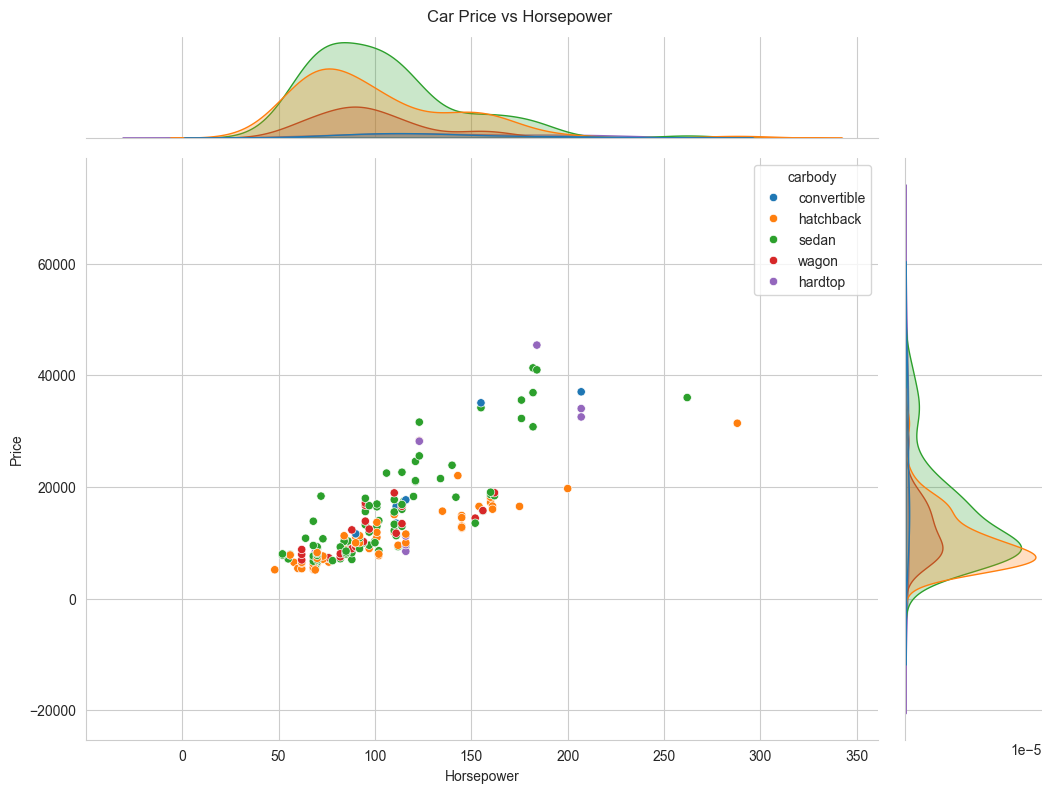

In [8]:
sns.set_style('whitegrid')
sns.jointplot(data=df_CarPriceCSV,x='horsepower',y='price',hue='carbody')
plt.gcf().set_size_inches(11,8)
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.suptitle('Car Price vs Horsepower', y=1.01)

Now, we will look at the numerical values and see how they are correlated. We will use a heatmap to check the correlation.

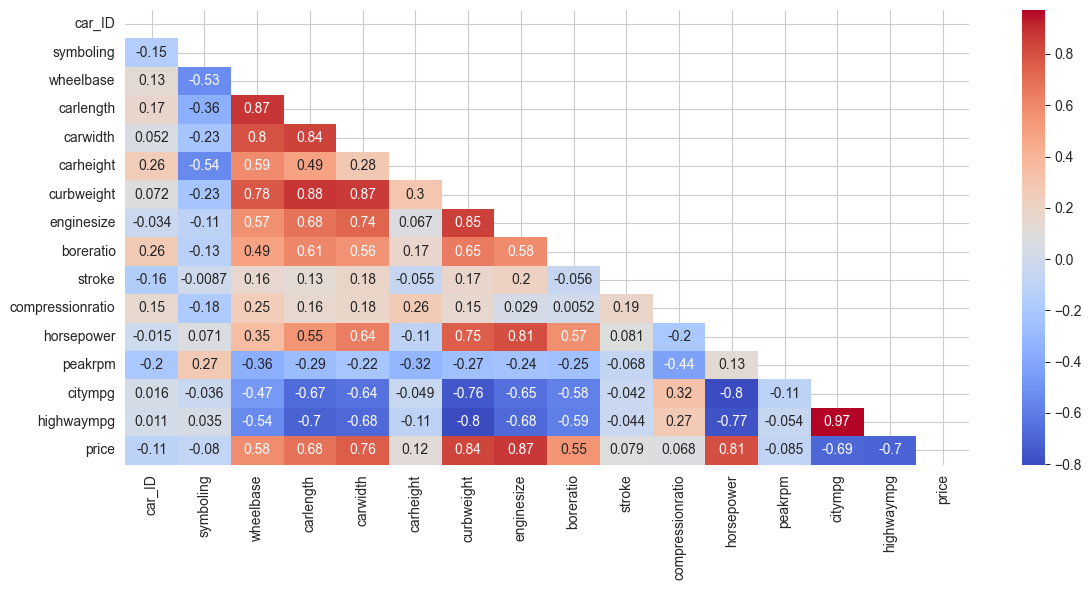

In [9]:
plt.figure(figsize=(12, 6))
corr = df_CarPriceCSV.corr(numeric_only=True)

mask = np.zeros_like(corr, dtype=np.bool_) ## Create a mask to hide the upper triangle
mask[np.triu_indices_from(mask)] = True 

sns.heatmap(corr, annot=True,mask=mask, cmap='coolwarm')
plt.tight_layout()

## Save the figure
#plt.savefig(r"C:\Users\admin\Documents\vscode-projects\Project-1\Images\heatmap.png")

#plt.show()

Using the heatmap, we can deduce that engine size, horsepower and curb weight all have a strong positive correlation with car price, while city/highway mpg show a negative correlation. Therefore, we can say that fuel-efficient cars are typically cheaper, and if we are building a pricing model we have to consider engine size, horsepower and curb weight as big factors.

---

# Drivewheel vs Horsepower

In this Plotly section, we want to look at if a type of drivewheel can affect horsepower. We will create a plotly box plot.

In [ ]:
import plotly.io as pio # Set default renderer to browser
pio.renderers.default = "browser"


fig = px.box(df_CarPriceCSV, x="drivewheel", y="horsepower", color="drivewheel",
             title="Horsepower Distribution by Drivewheel Type")
fig.show()